# Data Analysis on list of well received movies in India

Problem Statements :
1. Find the top 20 Highest Grossing movies.
2. Analyse how the Gross income earned from tickets has increased / decreased over the years

In [241]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1. FINDING OUT THE TOP 20 HIGHEST GROSSING MOVIES

In [242]:
#Importing the CSV file for analysis

movies = pd.read_csv("IMDB_INDIA.csv")
movies

,Unnamed: 0,Name,Rating,MetaScore,Vote_Count,Genre,Gross,Year
0,0,The Trial of the Chicago 7,NaN,NaN,NaN,"Drama, History, Thriller",NaN,2020.0
1,1,1917,8.3,78.0,369473.0,"Drama, War","159,227,644",2019.0
2,2,Aashram,8.0,NaN,9356.0,"Crime, Drama",NaN,2020.0
3,3,Cargo,5.8,NaN,1719.0,"Drama, Fantasy, Sci-Fi",NaN,2019.0
4,4,Jumanji: Welcome to the Jungle,6.9,58.0,310005.0,"Action, Adventure, Comedy","404,515,480",2017.0
...,...,...,...,...,...,...,...,...
67745,67745,The Octonauts,7.4,NaN,740.0,Animation,NaN,2010.0
67746,67746,Viceroy's House,6.7,53.0,6684.0,"Biography, Drama, History","1,105,717",2017.0
67747,67747,Yeh Jawaani Hai Deewani,7.1,NaN,37427.0,"Drama, Musical, Romance","3,827,466",2013.0
67748,67748,Tanhaji: The Unsung Warrior,7.6,NaN,19686.0,"Action, Biography, Drama",NaN,2020.0


DATA CLEANING PROCESS

In [243]:
#Removing ',' from values in Gross column and coverting them to int for performing numeric calculations.

#Let's assume that the films that have a Gross value of NaN were released on OTT. Hence we can replace those NaN with zero values.

movies["Gross"].fillna('0', inplace = True)
movies["Gross"] = movies["Gross"].str.replace('[\,]', '').astype(int)

#Checking for NaN values after the r
movies["Gross"].isna().sum()

C:\Users\navee\AppData\Local\Temp/ipykernel_7280/3240183268.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  movies["Gross"] = movies["Gross"].str.replace('[\,]', '').astype(int)


0

In [244]:
#Removing the additional unamed index column

movies.drop("Unnamed: 0", axis = 1, inplace = True)

In [245]:
#Checking for duplicates in Movies column and removing them

movies.drop_duplicates(subset=['Name', 'Year'], keep = 'first', inplace = True)

In [246]:
#Verifying that we don't have any duplicate movies

movies.duplicated().sum()

0

FILTERING DATA BASED ON THE GROSS VALUE AND THE YEAR RELEASED

In [249]:
#Let's extract the top 20 highest grossing movies
Top = movies[["Gross","Year"]]
Top = Top.sort_values("Gross", ascending = False)
Top20 = Top.sort_values("Gross", ascending = False).head(20)
Top20

,Gross,Year
4,404515480,2017.0
16,209397903,2011.0
26,182207973,2012.0
1,159227644,2019.0
23,141319928,2008.0
5,137690172,2018.0
46,100240551,2011.0
58,85468508,2011.0
56,79884879,2011.0
13,75395035,2016.0


2. ANALYSIS ON HOW THE GROSS INCOME FROM TICKETS HAS INCREASED / DECREASED OVER YEARS

<BarContainer object of 9985 artists>

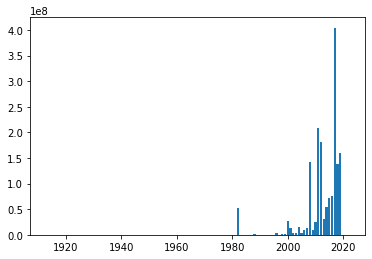

In [248]:
#Let's take the Gross income values and compare them with the years they were released.
plt.bar(Top["Year"], Top["Gross"])